In [1]:
from __future__ import print_function
from lcapy import L,C,R
import numpy as np
from scipy.constants import e,pi,h
import matplotlib.pyplot as plt
from core import Bbox

## Building the circuit
- Circuit elements are created with the functions L,C or R which take as argument a string corresponding to the name of the circuit element, the Junction will be created using L('L_J')
- Elements are assembled in series using the add symbol + and in parallel using |
- The circuit must be start with the junction and all other elements should be added in parallel. All circuits will hence start with L('L_J') | ....

In [2]:
b_cQED = Bbox(L('L_J') | C('C')| R('R_J') | (C('Cc')+(C('Cr')|L('Lr')|(C('Cf')+R('R_50')))))

Distance conflict 0.2999999999999998 vs 0.5 in horizontal graph for Wanon12 between nodes 11, 13, 15 and 9, 17, 7, due to incompatible sizes


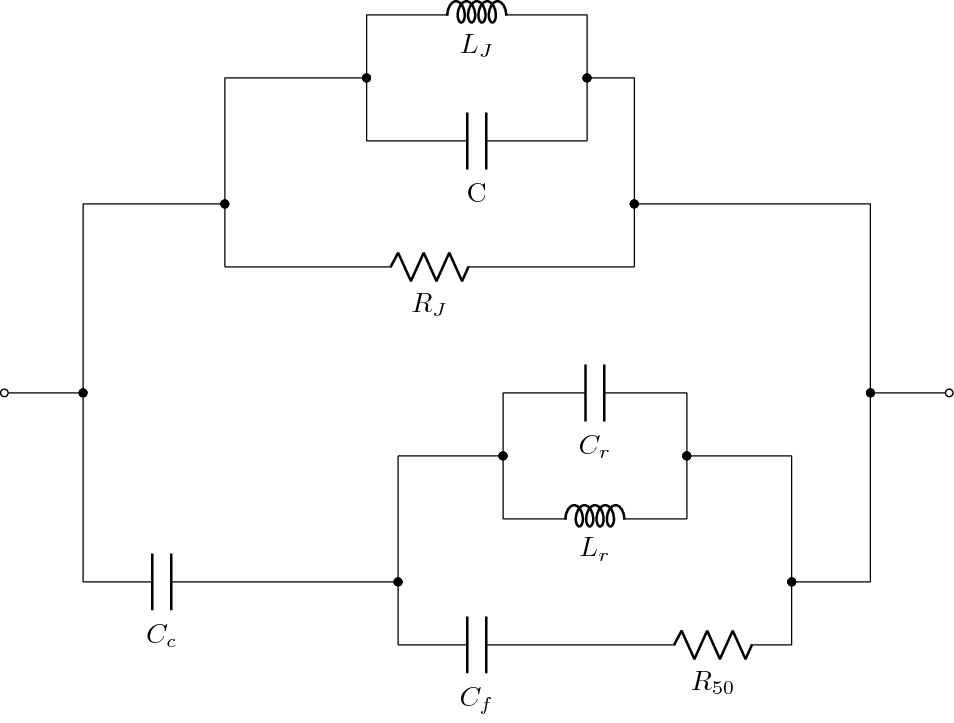

In [3]:
b_cQED.draw()

## Obtaining frequencies, dissipation and anharmonicity

* The main function is 'normalmodes' which takes a dictionary of parameters and returns the frequencies, dissipation rates and anharmonicities (all in Hz).
* One parameter may be given as a list, and below we mimic the flux being swept through a SQUID by giving L_J as a list.

In [4]:
flux = np.linspace(0.,0.4,103)
L_J_list = 7e-9/abs(np.cos(pi*flux))
to_plot =  np.array(b_cQED.normalmodes({
    'L_J':L_J_list,
    'C':100e-15,
    'Cc':10e-15,
    'Cf':1e-15,
    'R_50':50.,
    'Lr':10e-9,
    'Cr':100e-15,
    'R_J':1e6,
    'R_r':1e5
}))

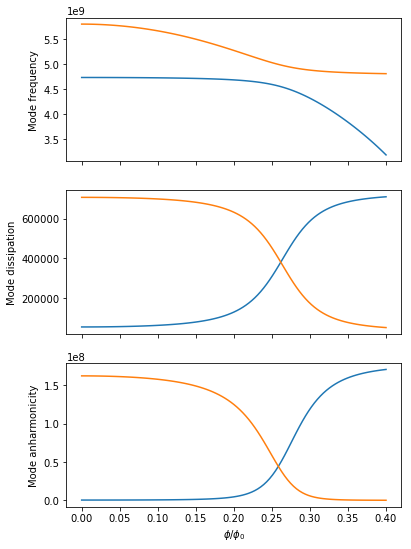

In [5]:
fig,axarr = plt.subplots(3,1,figsize=(6,9),sharex=True)
for i,ax in enumerate(axarr):
    for j in range(b_cQED.N_modes):
        axarr[i].plot(flux,to_plot[j,i])
axarr[0].set_ylabel("Mode frequency")
axarr[1].set_ylabel("Mode dissipation")
axarr[2].set_ylabel("Mode anharmonicity")
axarr[2].set_xlabel("$\phi/\phi_0$")
plt.show()